In [1]:
#importing the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df= pd.read_csv("cancer_dataset_wpbc.csv")

In [3]:
df.head()

,ID,Outcome,Time,Mean Radius,Mean Texture,Mean Perimeter,Mean Area,Mean Smoothness,Mean Compactness,Mean Concavity,...,Worst Perimeter,Worst Area,Worst Smoothness,Worst Compactness,Worst Concavity,Worst Concave Points,Worst Symmetry,Worst Fractal Dimension,Tumor Size,Lymph Node Status
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5.0
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2.0
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0.0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0.0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0.0


In [4]:
df.columns

Index(['ID', 'Outcome', 'Time', 'Mean Radius', 'Mean Texture',
       'Mean Perimeter', 'Mean Area', 'Mean Smoothness', 'Mean Compactness',
       'Mean Concavity', 'Mean Concave Points', 'Mean Symmetry',
       'Mean Fractal Dimension', 'SE Radius', 'SE Texture', 'SE Perimeter',
       'SE Area', 'SE Smoothness', 'SE Compactness', 'SE Concavity',
       'SE Concave Points', 'SE Symmetry', 'SE Fractal Dimension',
       'Worst Radius', 'Worst Texture', 'Worst Perimeter', 'Worst Area',
       'Worst Smoothness', 'Worst Compactness', 'Worst Concavity',
       'Worst Concave Points', 'Worst Symmetry', 'Worst Fractal Dimension',
       'Tumor Size', 'Lymph Node Status'],
      dtype='object')

### Data preprocessing Step

In [5]:
df.isna().any()

ID                         False
Outcome                    False
Time                       False
Mean Radius                False
Mean Texture               False
Mean Perimeter             False
Mean Area                  False
Mean Smoothness            False
Mean Compactness           False
Mean Concavity             False
Mean Concave Points        False
Mean Symmetry              False
Mean Fractal Dimension     False
SE Radius                  False
SE Texture                 False
SE Perimeter               False
SE Area                    False
SE Smoothness              False
SE Compactness             False
SE Concavity               False
SE Concave Points          False
SE Symmetry                False
SE Fractal Dimension       False
Worst Radius               False
Worst Texture              False
Worst Perimeter            False
Worst Area                 False
Worst Smoothness           False
Worst Compactness          False
Worst Concavity            False
Worst Conc

In [6]:
#As we can see Lymph Node status contains Na values lets replace those values with mean value
df["Lymph Node Status"].fillna(df["Lymph Node Status"].mean(), inplace = True)

In [7]:
m = df.shape[0]
print("Total No.of Samples in dataset is ", m)


Total No.of Samples in dataset is  198


In [8]:
def splitData(df, features_needed):
    dfNeed = df[features_needed]
    dfNeed.insert(0, 'Ones', 1)
    split = int(0.8*m)
    train = dfNeed[:split]
    test = dfNeed[split:]
    return train, test

In [9]:
def splitXy(data):
    cols = data.shape[1]
    X = np.matrix(data.iloc[:,0:cols-1].values)
    y = np.matrix(data.iloc[:,cols-1:cols].values)
    return X, y

### 1. Linear Regression with one variable

In [10]:
'''
a. Implement linear regression to predict tumor size (Tumor Size) using “Mean Texture” 
feature from dataset. “Tumor Size” will be the target variable.
b. Evaluate performance using metrics (such as Mean Squared Error (MSE), R-squared (R²), 
and Adjusted R-squared (Adjusted R²). You may also use graphs for explaining your
observations.
'''

'\na. Implement linear regression to predict tumor size (Tumor Size) using “Mean Texture” \nfeature from dataset. “Tumor Size” will be the target variable.\nb. Evaluate performance using metrics (such as Mean Squared Error (MSE), R-squared (R²), \nand Adjusted R-squared (Adjusted R²). You may also use graphs for explaining your\nobservations.\n'

In [11]:
features_needed = ['Mean Texture', 'Tumor Size']
train, test = splitData(df, features_needed)

In [12]:
Xtrain, ytrain = splitXy(train)
Xtest, ytest = splitXy(test)

In [13]:
Xtrain.shape, ytrain.shape, Xtest.shape, ytest.shape

((158, 2), (158, 1), (40, 2), (40, 1))

In [14]:
def mse(actual, predicted):
    error = np.power(predicted - actual, 2)
    cost = np.sum(error) / (2*len(actual))
    return cost

In [15]:
def rsquared(actual, predicted):
    actual_mean = np.mean(actual)
    ssr = np.sum(np.power((predicted - actual_mean),2))
    sst = np.sum(np.power((actual - actual_mean),2))
    return (1 - (ssr/sst))

In [16]:
def adjustedrsquared(X,actual,predicted):
    n = len(actual)
    k = X.shape[1]
    return ( 1 - (1-rsquared(actual,predicted))*(n-1)/(n-k-1))

In [17]:
def gradient_descent(X,y,weights,learning_rate,iterations):
    for i in range(iterations):
        y_hat = X * weights.T
        cost = mse(y_hat, y)
        loss = y_hat - y
        m = len(y_hat)
        gradient = np.dot(loss.T,X)/m
        store_weight.append(weights[0,1])
        store_cost.append(cost)
        weights = weights - (learning_rate * gradient)
        if(i%100 == 0):
            print("iteration: ",i,"Cost: ", cost)
    return weights

In [18]:
alpha = 0.001
iters = 1000
weights = np.matrix([0.1,0.01])
store_weight = []
store_cost = []
estimated_weights = gradient_descent(Xtrain,ytrain,weights,alpha,iters)

iteration:  0 Cost:  5.184772118544304
iteration:  100 Cost:  1.9449749941499577
iteration:  200 Cost:  1.9445218426256783
iteration:  300 Cost:  1.9440716606357853
iteration:  400 Cost:  1.9436244287207078
iteration:  500 Cost:  1.9431801275483938
iteration:  600 Cost:  1.9427387379134766
iteration:  700 Cost:  1.9423002407364425
iteration:  800 Cost:  1.9418646170628084
iteration:  900 Cost:  1.9414318480623005


In [19]:
estimated_weights

matrix([[0.17169618, 0.12305428]])

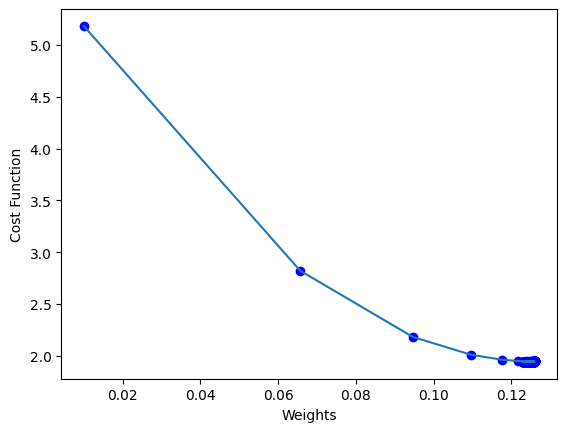

In [20]:
plt.scatter(store_weight, store_cost,marker=r'o',color='b')
plt.plot(store_weight, store_cost)
plt.xlabel("Weights")
plt.ylabel("Cost Function")
plt.show()

In [21]:
def predict(X,weights):
    predictions = X * weights.T
    return predictions

In [22]:
y_pred = predict(Xtest,estimated_weights)

In [23]:
mse(ytest,y_pred)

2.1442794935802265

In [24]:
rsquared(ytest, y_pred)

0.8305565532115363

In [25]:
adjustedrsquared(Xtest,ytest, y_pred)

0.8213974479797275

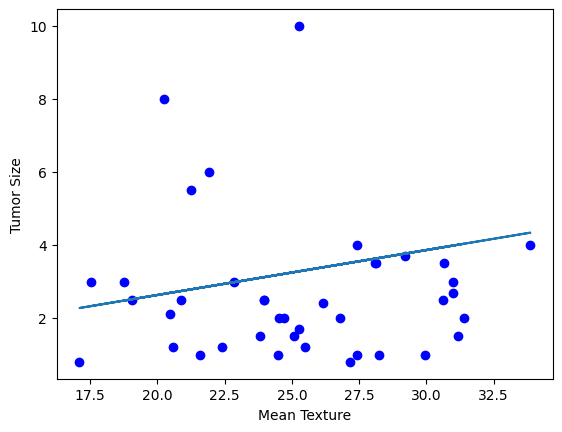

In [26]:
plt.scatter([Xtest[:,1]],[ytest],c='blue')
plt.xlabel("Mean Texture")
plt.ylabel("Tumor Size")
plt.plot(Xtest[:,1],y_pred)

### Linear Regression with 2 variables

In [27]:
'''
#2. 2. Linear Regression with Two Variables: (15 points)
a. Add 'Lymph Node Status' as an additional input feature to the previous linear regression 
model. Does adding this feature improve the performance of the model? Compare the 
performance of the models in Question 1 and Question 2 using evaluation metrics (such
as Mean Squared Error (MSE), R-squared (R²), and Adjusted R-squared (Adjusted R²). You 
may also use graphs for explaining yourobservations
'''

"\n#2. 2. Linear Regression with Two Variables: (15 points)\na. Add 'Lymph Node Status' as an additional input feature to the previous linear regression \nmodel. Does adding this feature improve the performance of the model? Compare the \nperformance of the models in Question 1 and Question 2 using evaluation metrics (such\nas Mean Squared Error (MSE), R-squared (R²), and Adjusted R-squared (Adjusted R²). You \nmay also use graphs for explaining yourobservations\n"

In [28]:
features_needed = ['Mean Texture','Lymph Node Status' ,'Tumor Size']
train, test = splitData(df, features_needed)

In [29]:
Xtrain, ytrain = splitXy(train)
Xtest, ytest = splitXy(test)
Xtrain.shape, ytrain.shape, Xtest.shape, ytest.shape

((158, 3), (158, 1), (40, 3), (40, 1))

In [30]:
def gradient_descent2(X,y,weights,learning_rate,iterations):
    for i in range(iterations):
        y_hat = X * weights.T
        cost = mse(y_hat, y)
        loss = y_hat - y
        m = len(y_hat)
        gradient = np.dot(loss.T,X)/m
        store_weight1.append(weights[0,1])
        store_weight2.append(weights[0,2])
        store_cost.append(cost)
        weights = weights - (learning_rate * gradient)
        if(i%100 == 0):
            print("iteration: ",i,"Cost: ", cost)
    return weights

In [31]:
alpha = 0.001
iters = 1000
weights = np.matrix([0.1,0.01,0.01])
store_weight1 = []
store_weight2 = []
store_cost = []
estimated_weights = gradient_descent2(Xtrain,ytrain,weights,alpha,iters)

iteration:  0 Cost:  5.044133451890978
iteration:  100 Cost:  1.453765859505629
iteration:  200 Cost:  1.4524534282084165
iteration:  300 Cost:  1.4519766232161688
iteration:  400 Cost:  1.451504939099207
iteration:  500 Cost:  1.4510363504657717
iteration:  600 Cost:  1.450570832224201
iteration:  700 Cost:  1.4501083642444481
iteration:  800 Cost:  1.4496489265399501
iteration:  900 Cost:  1.449192499255131


In [32]:
y_pred = predict(Xtest,estimated_weights)

In [33]:
mse(ytest,y_pred)

1.7316861078750698

In [34]:
rsquared(ytest, y_pred)

0.7591752993525289

In [35]:
adjustedrsquared(Xtest,ytest, y_pred)

0.739106574298573

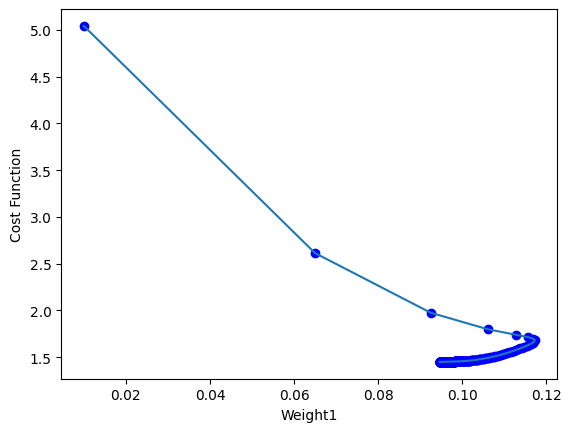

In [36]:
plt.scatter(store_weight1, store_cost,marker=r'o',color='b')
plt.plot(store_weight1, store_cost)
plt.xlabel("Weight1")
plt.ylabel("Cost Function")
plt.show()

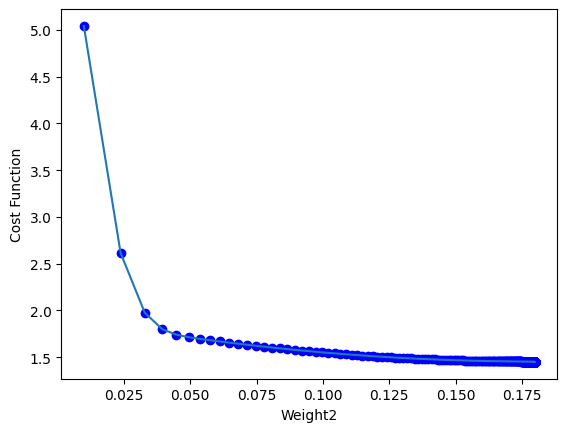

In [37]:
plt.scatter(store_weight2, store_cost,marker=r'o',color='b')
plt.plot(store_weight2, store_cost)
plt.xlabel("Weight2")
plt.ylabel("Cost Function")
plt.show()

### StepWise Linear Regression

In [38]:
'''
3. Stepwise Linear Regression: (50 points)
 In this section, you will explore stepwise linear regression to determine the most relevant features for 
 predicting tumor size.
a. Select any 5 features out of the 10 provided below. Implement forward stepwise linear 
regression with the chosen features. The process involves iteratively adding one feature 
at a time from your selection. After adding each feature, evaluate the model's 
performance using metrics such as Mean Squared Error, R-squared, Adjusted R-squared, 
or BIC-Bayesian Information Criterion (preferred). Choose the feature that contributes 
the most to improving the model's performance and add it to the model. Continue this 
iterative process for a total of 5 iterations. Explain your selection criteria for adding or 
removing features
'''

"\n3. Stepwise Linear Regression: (50 points)\n In this section, you will explore stepwise linear regression to determine the most relevant features for \n predicting tumor size.\na. Select any 5 features out of the 10 provided below. Implement forward stepwise linear \nregression with the chosen features. The process involves iteratively adding one feature \nat a time from your selection. After adding each feature, evaluate the model's \nperformance using metrics such as Mean Squared Error, R-squared, Adjusted R-squared, \nor BIC-Bayesian Information Criterion (preferred). Choose the feature that contributes \nthe most to improving the model's performance and add it to the model. Continue this \niterative process for a total of 5 iterations. Explain your selection criteria for adding or \nremoving features\n"

In [39]:
#let 5 features be 'Mean Radius', 'Mean Smoothness', 'Mean Fractal Dimension', 'Worst Radius', 'Lymph Node Status'
features_needed = ['Mean Radius', 'Mean Smoothness', 'Mean Fractal Dimension', 'Worst Radius', 'Lymph Node Status', 'Tumor Size']
train, test = splitData(df, features_needed)

In [40]:
Xtrain, ytrain = splitXy(train)
Xtest, ytest = splitXy(test)
Xtrain.shape, ytrain.shape, Xtest.shape, ytest.shape

((158, 6), (158, 1), (40, 6), (40, 1))

In [41]:
def gradient_descent3(X,y,weights,learning_rate,iterations):
    for i in range(iterations):
        y_hat = X * weights.T
        cost = mse(y_hat, y)
        loss = y_hat - y
        m = len(y_hat)
        gradient = np.dot(loss.T,X)/m
        weights = weights - (learning_rate * gradient)
#         if(i%100 == 0):
#             print("iteration: ",i,"Cost: ", cost)
    return weights

In [42]:
# Forward Stepwise Regression
def forward_stepwise_regression(X, y, num_iterations):
    n, p = X.shape  # Number of samples and predictors
    selected_features = []  # List to store selected feature indices
    remaining_features = list(range(p))  # List of remaining feature indices
    best_model = None
    best_score = float('-inf')

    for i in range(num_iterations):
        best_feature = None

        for feature in remaining_features:
            # Add the selected feature to the currently selected features
            current_features = selected_features + [feature]
            #Prepare the Data
            X_current = X[:, current_features]
            
            beta = np.matrix(np.ones(X_current.shape[1]))
            beta = gradient_descent3(X_current,y,beta,0.001,1000)
            
            # Calculate the R-squared score for the current model
            y_pred = X_current * beta.T
            r2 = rsquared(y, y_pred)

            # If the R-squared score is better than the previous best, update
            if r2 > best_score + 0.0001:
                best_score = r2
                best_feature = feature

        # Add the best feature to the selected features and remove it from remaining
        if best_feature is not None:
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)
            best_model = beta

        print(f"Iteration {i + 1}: Added feature {best_feature}, R-squared = {best_score:.4f}")

    return best_model, selected_features

# Perform forward stepwise regression for 5 iterations
num_iterations = 5
forward_model, selected_features = forward_stepwise_regression(Xtrain, ytrain, num_iterations)
print("Selected features:", selected_features)
print("foward best model:", forward_model)

Iteration 1: Added feature 1, R-squared = 0.9297
Iteration 2: Added feature 0, R-squared = 0.9673
Iteration 3: Added feature 2, R-squared = 0.9707
Iteration 4: Added feature 3, R-squared = 0.9730
Iteration 5: Added feature None, R-squared = 0.9730
Selected features: [1, 0, 2, 3]
foward best model: [[0.07393045 0.93761519 0.99276994 0.1741231 ]]


## Backward Propogation

In [43]:
all_features = ['Mean Radius', 'Mean Perimeter', 'Mean Area', 'Mean Smoothness', 'Mean Symmetry',
                'Mean Fractal Dimension', 'Worst Radius', 'Worst Area', 'Worst Symmetry', 
 'Lymph Node Status', 'Tumor Size']

train, test = splitData(df, all_features)
all_features.remove('Tumor Size')

In [44]:
Xtrain, ytrain = splitXy(train)
Xtest, ytest = splitXy(test)
Xtrain.shape, ytrain.shape, Xtest.shape, ytest.shape

((158, 11), (158, 1), (40, 11), (40, 1))

In [45]:


# Set the significance level for feature removal (e.g., p-value threshold)
alpha = 0.05
Y = ytrain
# Initialize the list of selected features with all features
selected_features = all_features.copy()

# Perform backward stepwise regression
while len(selected_features) > 0:
    # Extract the corresponding columns from the dataset
    X = Xtrain
    
    # Add a column of ones for the intercept term
    X = np.column_stack([np.ones(X.shape[0]), X])
    
    # Fit a linear regression model using matrix operations
    XTX_inv = np.linalg.inv(np.dot(X.T, X))
    model_params = np.dot(np.dot(XTX_inv, X.T), Y)
    
    # Calculate the predicted values
    Y_pred = np.dot(X, model_params)
    
    # Calculate the residuals
    residuals = Y - Y_pred
    
    # Calculate the degrees of freedom
    df = X.shape[0] - X.shape[1]
    
    # Calculate the residual sum of squares (RSS)
    rss = np.sum(np.power(residuals,2))
    
    # Calculate the mean squared error (MSE)
    mse = rss / df
    
    # Calculate the standard errors of coefficients
    se = np.sqrt(np.diag(np.dot(XTX_inv, mse)))
    
    # Calculate the t-statistics for each coefficient
    t_stats = model_params / se
    
    # Calculate the p-values for each coefficient
    p_values = 2 * (1 - np.abs(np.array([t_stats])))
    
    # Find the feature with the highest p-value
    max_p_value_feature = selected_features[np.argmax(p_values)]
    
    # Check if the highest p-value exceeds the significance level
    if np.max(p_values) > alpha:
        # Remove the feature with the highest p-value from selected features
        selected_features.remove(max_p_value_feature)
    else:
        # If all remaining features have p-values below the significance level, stop
        break

# Print the selected features and the final model parameters
print("Selected Features:", selected_features)
print("Final Model Parameters:", model_params)


Selected Features: ['Mean Radius', 'Mean Perimeter', 'Mean Area', 'Mean Smoothness', 'Mean Symmetry', 'Mean Fractal Dimension', 'Worst Radius', 'Worst Area', 'Worst Symmetry', 'Lymph Node Status']
Final Model Parameters: [[-1.96771581e+15]
 [ 1.96771581e+15]
 [-8.21931792e+00]
 [ 9.01972070e-01]
 [ 1.04740127e-02]
 [ 1.68098637e+02]
 [ 2.24295213e+01]
 [-4.45757270e+02]
 [ 2.39966779e-02]
 [ 2.82344930e-04]
 [-1.92763564e+00]
 [ 1.72054669e-01]]


C:\Users\Mahesh\AppData\Local\Temp\ipykernel_24652\1564536882.py:35: RuntimeWarning: invalid value encountered in sqrt
  se = np.sqrt(np.diag(np.dot(XTX_inv, mse)))


In [46]:
# i was encountering error with back propogation i was not able to figure out 

### Regularization

In [47]:
alpha = 0.1
X = train[['Mean Radius', 'Mean Smoothness', 'Mean Fractal Dimension', 'Worst Radius']].to_numpy()
y = train['Tumor Size']
def ridge_regression(X, y, alpha):
    n_samples, n_features = X.shape
    XTX = X.T.dot(X)
    ridge_matrix = XTX + alpha * np.identity(n_features)
    coefficients = np.linalg.inv(ridge_matrix).dot(X.T).dot(y)
    
    return coefficients

coefficients = ridge_regression(X, y, alpha)
print("Coefficients:", coefficients)

Coefficients: [ 0.27629377  1.41042655  0.87676209 -0.09873039]


### Scalilng

In [48]:
def min_max_scaling(data):
    scaled_data = []
    
    # Find the minimum and maximum values for each column
    min_values = [min(column) for column in zip(*data)]
    max_values = [max(column) for column in zip(*data)]
    
    for row in data:
        scaled_row = []
        for i in range(len(row)):
            # Scale each value to the range [0, 1]
            scaled_value = (row[i] - min_values[i]) / (max_values[i] - min_values[i])
            scaled_row.append(scaled_value)
        scaled_data.append(scaled_row)
    
    return scaled_data